# NLP 2025
# Lab 1: Tokenization

Tokenization is a fundamental step in **Natural Language Processing (NLP)** 🧠💬 that transforms raw text into structured data for computational models. In this lab, you will explore different **tokenization techniques** 📝, preprocess text data 🔍, and implement **tokenization pipelines** using popular NLP libraries 🏗️.  

You will also gain **hands-on experience** with **Hugging Face Datasets 🤗📚**, while assessing the impact of tokenization choices on downstream NLP tasks. 

By the end of this lab, you will have a **strong foundation** in tokenization techniques and be able to apply them effectively in **real-world NLP applications** 🌍.  

---

### 🎯 **Learning Goals**  

By the end of this lab, you should be able to:  

✅ **Understand the role of tokenization in NLP** 🧠💡  
✅ **Explain why tokenization is important** and how it affects text processing 📖🔍  
✅ **Implement different tokenization techniques** – Apply **word** 📝, **subword** 🔢, and **character-level** 🔠 tokenization using built-in libraries.  
✅ **Use Hugging Face Datasets** 🤗📊 – Load and preprocess text datasets efficiently.  
✅ **Evaluate tokenization impact** 📉🔎 – Analyze how different tokenization methods influence model performance.  
✅ **Identify challenges in tokenization** ❗🔍 – Recognize issues like **out-of-vocabulary (OOV) words**, **ambiguity**, and **multilingual tokenization** 🌍.  

### Score breakdown

| Exercise            | Points |
|---------------------|--------|
| [Exercise 1](#e1)   | 5      |
| [Exercise 2](#e2)   | 6      |
| [Exercise 3](#e3)   | 5      |
| [Exercise 4](#e4)   | 12     |
| [Exercise 5](#e5)   | 5      |
| [Exercise 6](#e6)   | 22     |
| [Exercise 7](#e7)   | 5      |
| [Exercise 8](#e8)   | 5      |
| [Exercise 9](#e9)   | 10     |
| [Exercise 10](#e10) | 25     |
| Total               | 100    |

This score will be scaled down to 0.5 and that will be your final lab score.

### 📌 **Instructions for Delivery** (📅 **Deadline: 11/Apr 18:00**, 🎭 *wildcards possible*)  

✅ **Submission Requirements**  
+ 📄 You need to submit a **PDF of your report** (use the templates provided in **LaTeX** 🖋️ (*preferred*) or **Word** 📑) and a **copy of your notebook** 📓 with the code.  
+ ⚡ Make sure that **all cells are executed properly** ⚙️ and that **all figures/results/plots** 📊 you include in the report are also visible in your **executed notebook**.  

✅ **Collaboration & Integrity**  
+ 🗣️ While you may **discuss** the lab with others, you must **write your solutions with your group only**. If you **discuss specific tasks** with others, please **include their names** in the appendix of the report.  
+ 📜 **Honor Code applies** to this lab. For more details, check **Syllabus §7.2** ⚖️.  
+ 📢 **Mandatory Disclosure**:  
   - Any **websites** 🌐 (e.g., **Stack Overflow** 💡) or **other resources** used must be **listed and disclosed**.  
   - Any **GenAI tools** 🤖 (e.g., **ChatGPT**) used must be **explicitly mentioned**.  
   - 🚨 **Failure to disclose these resources is a violation of academic integrity**. See **Syllabus §7.3** for details.   

## Preparation

In [1]:
! pip install -U datasets~=3.2.0
! python -m pip install -U matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import re
from collections import Counter

import datasets
import pandas as pd
import tqdm

/Users/mariowettig/PycharmProjects/NLP_Labs/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 0. Intro to regular expressions

In this introduction section, you can practice the use of regular expressions in python. You can find the documentation here: [https://docs.python.org/3/library/re.html](https://docs.python.org/3/library/re.html). The main functions of the re module are:
- `re.search()` - searches for a pattern in a string, returns the first match,
- `re.findall()` - similar to `search()`, but returns a list of all matches,
- `re.sub()` - replaces the matches with a string.

All above functions accept the regular expression pattern as their argument. The patterns are strings that represent the rules for matching the text. In python they start with `r` character, e.g. `r'\d'` is a pattern that matches a digit.

Let us start with a simple example. We will search for the word "world" in the string "Hello, world!".

In [3]:
text = "Hello, world!"
pattern = r'world'
match = re.search(pattern, text)
print(match)

<re.Match object; span=(7, 12), match='world'>


The `search()` function returns a match object that tells us where the match was found (`span` argument) and the exact part of the string that matched the pattern (`group` argument).

Below you can find the examples from the lecture.

In [4]:
# Disjunctions
pattern = r'[wW]oodchuck' # matches both "woodchuck" and "Woodchuck"
pattern = r'[1234567890]' # matches any digit
pattern = r'[0-9]' # matches any digit
pattern = r'[A-Z]' # matches any uppercase letter
pattern = r'[a-z]' # matches any lowercase letter
pattern = r'[A-Za-z]' # matches any letter

# Disjunctions with pipe |
pattern = r'groundhog|Woodchuck' # matches both "woodchuck" and "Woodchuck"

# Negation (only when in [])
pattern = r'[^0-9]' # matches any character that is not a digit
pattern = r'[^Ss]' # matches any character that is not 'S' or 's'
pattern = r'a^b' # matches the string "a^b"

# Quantifiers (+, *, ?, .)
pattern = r'baa+' # matches "ba" followed by one or more "a" (e.g. "baa", "baaa", "baaaa", ...)
pattern = r'oo*h' # matches "o" followed by zero or more "o" and then "h" (e.g. "oh", "ooh", "oooh", ...)
pattern = r'colou?r' # matches "color" and "colour"
pattern = r'beg.n' # matches "begun", "begin", "begnn", ...

# Anchors (^, $)
pattern = r'^Hello' # matches "Hello" at the beginning of the string
pattern = r'world!$' # matches "world!" at the end of the string

## 1. Huggingface datasets

For this lab, we will use the **Hugging Face Datasets** library ([Hugging Face Datasets](https://huggingface.co/datasets)), which provides an extensive collection of ready-to-use NLP datasets. The library is designed to be lightweight, efficient, and compatible with popular deep learning frameworks such as PyTorch and TensorFlow.  

You can find the full documentation and tutorials here:  
📌 [Hugging Face Datasets Documentation](https://huggingface.co/docs/datasets/en/index)  

### **Why use Hugging Face Datasets?**  
- **Easy Access:** Load datasets with a single command without manual downloads.  
- **Standardized Format:** Datasets come in a unified structure, making them easy to preprocess and integrate into ML pipelines.  
- **Large Collection:** Provides datasets for a wide range of NLP tasks, including classification, translation, summarization, and more.  
- **Seamless Integration:** Works with `transformers` and `sklearn` for preprocessing and model training.  

### **Dataset for this lab: TweetEval - Emoji Subset**  

In this lab, we will work with the **TweetEval** dataset, specifically the **emoji** subset. The TweetEval dataset is a benchmark for evaluating NLP models on Twitter-related tasks, covering tasks such as sentiment analysis, hate speech detection, and irony detection.  

For tokenization, we will focus only on the **text** (the content of the tweets), but we will also examine the **labels** to understand the dataset structure.  

🔗 The dataset description and details are available in its dataset card: [**TweetEval Dataset**](https://huggingface.co/datasets/cardiffnlp/tweet_eval) 

💡 Exploring More Datasets
Hugging Face provides a vast selection of datasets across different NLP tasks. You can browse and explore more at:
🔗 [Hugging Face Datasets Collection](https://huggingface.co/datasets)

In [5]:
tweet_ds = datasets.load_dataset('tweet_eval', 'emoji')
print(tweet_ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 5000
    })
})


The loaded dataset contains three subsets (“train”, “validation”, and “test”). Each consists of two columns: “text” and “label”. Label is an integer from 0 to 19 representing an emoji. See the dataset's card for more information. We can access the elements of the dataset like so:

In [6]:
for i in range(10):
    print(tweet_ds['train'][i])

{'text': 'Sunday afternoon walking through Venice in the sun with @user ️ ️ ️ @ Abbot Kinney, Venice', 'label': 12}
{'text': "Time for some BBQ and whiskey libations. Chomp, belch, chomp! (@ Lucille's Smokehouse Bar-B-Que)", 'label': 19}
{'text': 'Love love love all these people ️ ️ ️ #friends #bff #celebrate #blessed #sundayfunday @ San…', 'label': 0}
{'text': '️ ️ ️ ️ @ Toys"R"Us', 'label': 0}
{'text': 'Man these are the funniest kids ever!! That face! #HappyBirthdayBubb @ FLIPnOUT Xtreme', 'label': 2}
{'text': '#sandiego @ San Diego, California', 'label': 11}
{'text': 'My little ️ ️ ️ ️ ️ #ObsessedWithMyDog @ Cafe Solstice Capitol Hill', 'label': 0}
{'text': 'More #tinyepic things #tinyepicwestern, this one is crazy @user I may be one of your…', 'label': 19}
{'text': 'Last night ️ @ Omnia Night Club At Caesars Palace', 'label': 0}
{'text': 'friendship at its finest. ....#pixar #toystory #buzz #woody #friends #friendship #bff…', 'label': 7}


You can easily cast the dataset to the pandas DataFrame.

In [7]:
tweet_train_df = pd.DataFrame(tweet_ds['train'])
tweet_train_df

,text,label
0,Sunday afternoon walking through Venice in the...,12
1,Time for some BBQ and whiskey libations. Chomp...,19
2,Love love love all these people ️ ️ ️ #friends...,0
3,"️ ️ ️ ️ @ Toys""R""Us",0
4,Man these are the funniest kids ever!! That fa...,2
...,...,...
44995,Here to celebrate the Nunez wedding! Love my b...,0
44996,1 night in Paris.... Wait... @ Paris Las Vegas...,1
44997,Be safe this weekend everyone. #happylaborday ...,11
44998,"Pizza (@ Five50 - @user in Las Vegas, NV)",1


We can plot the distribution of the labels in the training subset.

       text
label      
0      9204
1      4901
2      4713
7      2345
4      2146


<Axes: xlabel='label'>

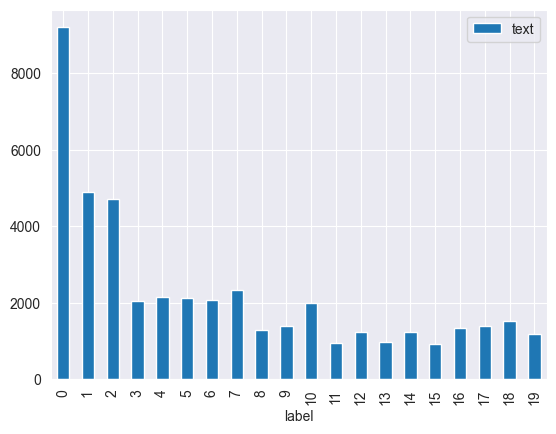

In [8]:
count_label = tweet_train_df.groupby('label').count()
print(count_label.sort_values(by='text', ascending=False).head(5))

tweet_train_df.groupby('label').count().plot.bar()

### Dataset's filter function
We can filter the examples using ```filter()``` method. See this link for more details https://huggingface.co/docs/datasets/en/use_dataset. Here is an example of filtering the short tweets (less than 20 characters) from the ```train``` subset.

In [9]:
short_tweets = tweet_ds['train'].filter(lambda example: len(example['text']) < 20)
print(short_tweets)

Dataset({
    features: ['text', 'label'],
    num_rows: 506
})


In [10]:
for i in range(10):
    print(short_tweets[i])

{'text': '️ ️ ️ ️ @ Toys"R"Us', 'label': 0}
{'text': '️ @ Columbia River', 'label': 12}
{'text': 'My weekend: @user 3', 'label': 6}
{'text': 'good day today', 'label': 3}
{'text': 'My last RT...', 'label': 2}
{'text': '@ On Lake Cowichan', 'label': 13}
{'text': '@ Macroplaza', 'label': 4}
{'text': '@ BART Train', 'label': 6}
{'text': '️ 4 a tbh&amp; rate', 'label': 0}
{'text': '@user Oh nice!!', 'label': 14}


### Dataset's map function
Datasets library contains a very useful method map. It expects a function that will receive an example from the dataset. This function will be applied to all entries. We will calculate the length of the text (in characters) in each example.

In [11]:
def calculate_text_length(example):
    example['text_length'] = len(example['text'])
    return example

In [12]:
tweet_ds = tweet_ds.map(calculate_text_length)
print(tweet_ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'text_length'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['text', 'label', 'text_length'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label', 'text_length'],
        num_rows: 5000
    })
})


We can plot the histogram of the text lengths.

<Axes: ylabel='Frequency'>

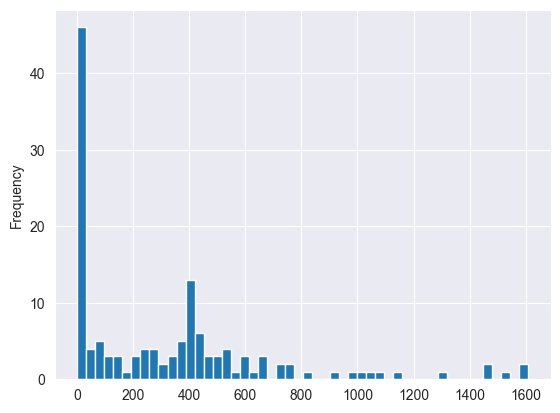

In [13]:
pd.DataFrame(tweet_ds['train']).groupby('text_length')['text_length'].count().plot.hist(bins=50)

<a name="e1"></a>

### Exercise 1: Questions about the datasets
1. (1p) What is the size of the training, test and validation datasets?
2. (1p) What are the top 5 most frequent emojis in the validation dataset?
3. (1p) Compare the distributions of labels (emojis) between training and validation datasets.
4. (1p) How many examples with the "fire" emoji are in the training dataset?
5. (1p) What is the average length (in characters) of the tweets in the training dataset?

You can add cells here to answer the questions

In [14]:
tweet_val_df = pd.DataFrame(tweet_ds['validation'])
tweet_train_df = pd.DataFrame(tweet_ds['train'])
tweet_test_df = pd.DataFrame(tweet_ds['test'])

45000 5000 50000
       text  text_length
label                   
0      9204         9204
1      4901         4901
2      4713         4713
7      2345         2345
4      2146         2146


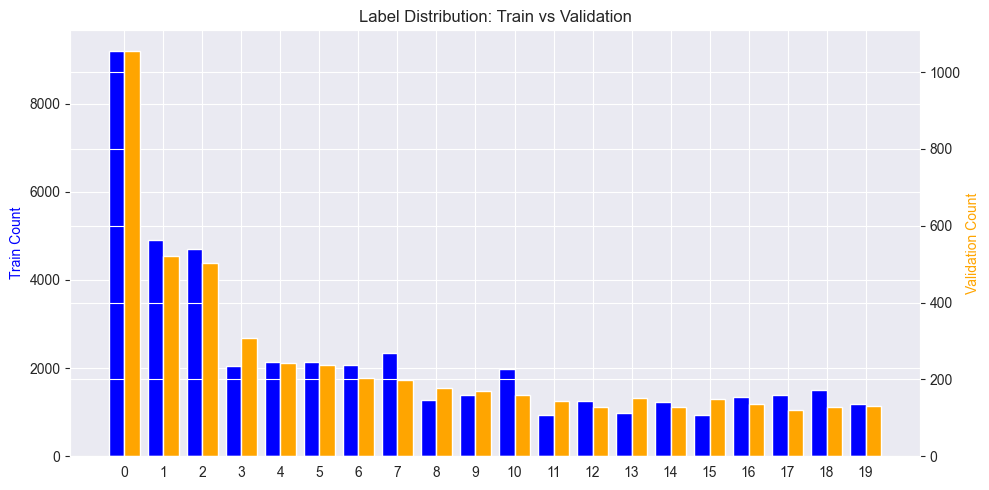

2146
71.01691111111111


/var/folders/5v/x_y24nhs0kzbn0lkzdgqp0x80000gn/T/ipykernel_2408/3658082618.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(train_label_counts[4]) # fire emoji


,text,label,text_length,emoji
0,"Sunday afternoon walking through Venice in the sun with @user ️ ️ ️ @ Abbot Kinney, Venice",12,90,☀
1,"Time for some BBQ and whiskey libations. Chomp, belch, chomp! (@ Lucille's Smokehouse Bar-B-Que)",19,96,😜
2,Love love love all these people ️ ️ ️ #friends #bff #celebrate #blessed #sundayfunday @ San…,0,92,❤
3,"️ ️ ️ ️ @ Toys""R""Us",0,19,❤
4,Man these are the funniest kids ever!! That face! #HappyBirthdayBubb @ FLIPnOUT Xtreme,2,86,😂
5,"#sandiego @ San Diego, California",11,33,🇺🇸
6,My little ️ ️ ️ ️ ️ #ObsessedWithMyDog @ Cafe Solstice Capitol Hill,0,67,❤
7,"More #tinyepic things #tinyepicwestern, this one is crazy @user I may be one of your…",19,85,😜
8,Last night ️ @ Omnia Night Club At Caesars Palace,0,49,❤
9,friendship at its finest. ....#pixar #toystory #buzz #woody #friends #friendship #bff…,7,86,✨


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### YOUR CODE HERE
#1 45k, 50k, 5k
print(len(tweet_train_df), len(tweet_val_df), len(tweet_test_df))

#2 0,1,2,7,4
count_label = tweet_train_df.groupby('label').count()
print(count_label.sort_values(by='text', ascending=False).head(5))

#3 Similar, Validation set looks Smoother and less noisy
train_counts = tweet_train_df['label'].value_counts()
val_counts = tweet_val_df['label'].value_counts()
labels = sorted(set(train_counts.index).union(val_counts.index))
train_values = [train_counts.get(label, 0) for label in labels]
val_values = [val_counts.get(label, 0) for label in labels]

x = range(len(labels))
width = 0.4
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.bar([i - width/2 for i in x], train_values, width=width, color='blue', label='Train')
ax1.set_ylabel('Train Count', color='blue')
ax2.bar([i + width/2 for i in x], val_values, width=width, color='orange', label='Validation')
ax2.set_ylabel('Validation Count', color='orange')
plt.xticks(x, labels, rotation=90)
plt.title('Label Distribution: Train vs Validation')
fig.tight_layout()
plt.show()

#4 2146
label_names = tweet_ds['train'].features['label'].names
train_label_counts = tweet_train_df['label'].value_counts()
train_label_counts.index = train_label_counts.index.map(lambda i: label_names[i])
label_mapping = {i: label for i, label in enumerate(label_names)}
label_mapping
# find count of fire emoji at label 4!!!
print(train_label_counts[4]) # fire emoji

#5 71.01691111111111
print(tweet_train_df["text_length"].mean())
tweet_train_df['emoji'] = tweet_train_df['label'].map(label_mapping)
# display the whole entry
pd.set_option('display.max_colwidth', None)
tweet_train_df.head(10)


## 2. Tokenization

In this section we will preprocess the dataset by cleaning and tokenizing the entries.
Datasets library contains a very useful method map. It expects a function that will receive an example from the dataset. This function will be applied to all entries.

### 2.1 Cleaning the text

<a name="e2"></a>
### Exercise 2: Write the text cleaning function

Include at least the following steps:
- (1p) remove comma between numbers, i.e. 15,000 -> 15000
- (1p) remove multiple spaces
- (1p) space out the punctuation (i.e. "hello, world." -> "hello , world .")
- (3x1p) three more cleaning steps of your choice

In [ ]:
def clean(example):
    """
    Cleans the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: update example containing 'clean' column

    """
    text = example['text']

    # Empty text
    if text == '':
        example['clean'] = ''
        return example

    # 'text' from the example can be of type numpy.str_, let's convert it to a python str
    text = str(text)

    ### YOUR CODE HERE
    
    #4 substitute by one occurance if some punction is repeated more than 4+
    text = re.sub(r'([.,!?;:])\1\1\1+', r'\1\1\1', text)
    
    # remove comma between numbers
    text = re.sub(r'(\d+),(\d+)', r'\1\2', text)
    
    # space out the punctuation
    text = re.sub(r"([.,!?;:])", r" \1 ", text)

    # remove multiple spaces
    text = re.sub(r"\s+", r" ", text)

    # three more cleaning steps of your choice
    
    #1 lowercase
    text = text.lower()
    
    #2 remove #, @, *, ^, () , {} , ...
    text = re.sub(r'[@#*^(){}\'\"%\$&\[\]]', r"", text)
    
    #3 delete the "-" between words
    text = re.sub(r'\-', r"", text)
    
    # remove the initial and final spaces
    text = text.strip()
    
    # reinforce the previous ones
    text = re.sub(r"([.,!?;:])", r" \1 ", text)
    text = re.sub(r" ️", r' ', text)
    text = re.sub(r"\s+", r' ', text)

    ### YOUR CODE ENDS HERE

    # Update the example with the cleaned text
    example['clean'] = text.strip()
    return example

This is an example of applying the ```clean()``` function you just wrote to a single entry of the dataset. The function added a 'clean' field to the example.

In [17]:
print('Original tweet item:')
print(tweet_ds['train'][2]['text'])
print('Cleaned tweet item:')
print(clean(tweet_ds['train'][2])['clean'])

Original tweet item:
Love love love all these people ️ ️ ️ #friends #bff #celebrate #blessed #sundayfunday @ San…
Cleaned tweet item:
love love love all these people friends bff celebrate blessed sundayfunday san…


Let's finally use the ```map()``` method and apply your `clean()` function to all entries of the dataset. You can see that the ```clean``` column has been added to each split.

Below, we will apply your function to all entries in the dataset.

In [18]:
tweet_ds = tweet_ds.map(clean)
print(tweet_ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'text_length', 'clean'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['text', 'label', 'text_length', 'clean'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label', 'text_length', 'clean'],
        num_rows: 5000
    })
})


### 2.2 Build vocabulary

In the previous section, we implemented the cleaning of the dataset. Now, we will tokenize the text splitting it by spaces. We will build a vocabulary based on the cleaned text of the `train` split. We will investigate some properties of corpora (e.g. Zipf's law).

The function below builds a vocabulary from the dataset. It counts the occurrences of the words in the dataset using the Counter class. Check the documentation here [collections.Counter](https://docs.python.org/3/library/collections.html#collections.Counter).

### Exercise 3: Build the vocabulary
(5p) Fill in the function below to build the vocabulary from the dataset. The function should return a `Counter` object with the words and their frequencies. The variable named `vocab` is already initialized as an empty `Counter` object.

In [19]:
def build_vocab_counter(dataset):
    """
    Builds a vocabulary from the dataset
    Args:
        dataset: a dataset

    Returns: a vocabulary

    """
    vocab = Counter()

    ### YOUR CODE HERE

    for example in tqdm.tqdm(dataset):
        tokens = example['clean'].split()
        vocab.update(tokens)

    ### YOUR CODE ENDS HERE
    return vocab

In [20]:
vocab_counter = build_vocab_counter(tweet_ds['train'])
print('Size of the vocabulary:', len(vocab_counter))

100%|██████████| 45000/45000 [00:00<00:00, 62514.32it/s]

Size of the vocabulary: 60513


Because we created a counter, we can easily check the most and least common words in the vocabulary. Do the most common words make sense? How about the least common ones?

In [21]:
print('Most common:')
print(vocab_counter.most_common(10))
print('Least common:')
print(vocab_counter.most_common()[-10:]) 

Most common:
[('.', 22551), ('!', 16412), ('the', 13458), (',', 12385), ('user', 12236), ('to', 7661), ('my', 7520), ('a', 6830), ('i', 6731), ('in', 5937)]
Least common:
[('corban…', 1), ('southbayla', 1), ('thedabberchick', 1), ('nector', 1), ('chefking1921express', 1), ('rolltide', 1), ('bffweekend', 1), ('nunez', 1), ('happylaborday', 1), ('five50', 1)]


We can also plot the counts of the words. You can check the [Power law](https://en.wikipedia.org/wiki/Power_law) if you are more interested.

Text(0, 0.5, 'count')

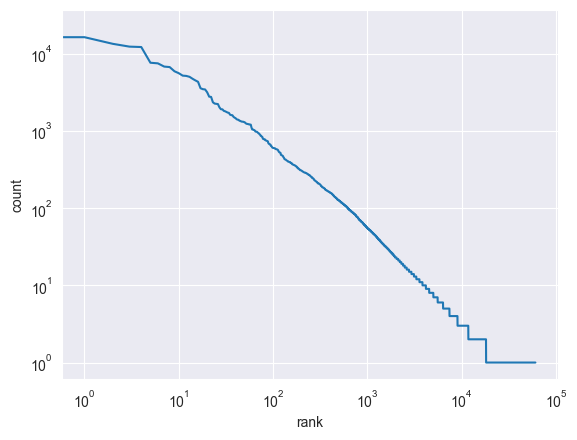

In [22]:
import matplotlib.pyplot as plt

plt.loglog([val for word, val in vocab_counter.most_common()])
plt.xlabel('rank')
plt.ylabel('count')

The plot shows that the distribution of the words in the vocabulary follows the Zipf's law. The most frequent word occurs approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.

We can also filter the vocabulary by the frequency of the words. We will only consider the most frequent words and mark the rest as the `<unk>` token. Here we set the maximum vocabulary size to 10,000. But in the later steps, you will experiment with different sizes.

In [23]:
max_vocab_size = 10000
vocab = vocab_counter.most_common(max_vocab_size)
# cast to list of words
vocab = [word for word, _ in vocab]
print(len(vocab))

10000


### Exercise 4: Frequency of pairs of words (bigrams)
Calculate the frequency of (neighbouring) pairs of words in the training dataset.
- (5p) List the most and least common pairs. Do the most common pairs make sense?
- (2p) How many pairs occur only once in the dataset?
- (5p) Plot the distribution of the pair frequencies.

In [24]:
# iterate over each text in dataset and iterate over each word in the text to count occurance over every i-1 i th word count
pair_count_counter = Counter()
for example in tweet_ds['train']:
    tokens = example['clean'].split()
    for i in range(len(tokens) - 1):
        word1 = tokens[i]
        word2 = tokens[i + 1]
        if word1 in vocab and word2 in vocab:
            pair_count_counter[(word1, word2)] += 1

print('Most common pairs:')
print(pair_count_counter.most_common(10))
print('Least common pairs:')
print(pair_count_counter.most_common()[-10:])

Most common pairs:
[(('.', '.'), 6611), (('!', '!'), 4402), ((',', 'california'), 3342), (('amp', ';'), 2019), (('los', 'angeles'), 1723), (('with', 'my'), 1071), (('in', 'the'), 1002), (('angeles', ','), 998), (('las', 'vegas'), 988), (('user', 'user'), 983)]
Least common pairs:
[(('chick', 'loveher'), 1), (('loveher', 'bff'), 1), (('bff', 'carshow'), 1), (('1', 'night'), 1), (('safe', 'this'), 1), (('beer', 'nv'), 1), (('mini', 'is'), 1), (('one', 'deserves'), 1), (('deserves', 'her'), 1), (('her', 'las'), 1)]


Number of pairs occurring just once: 109115


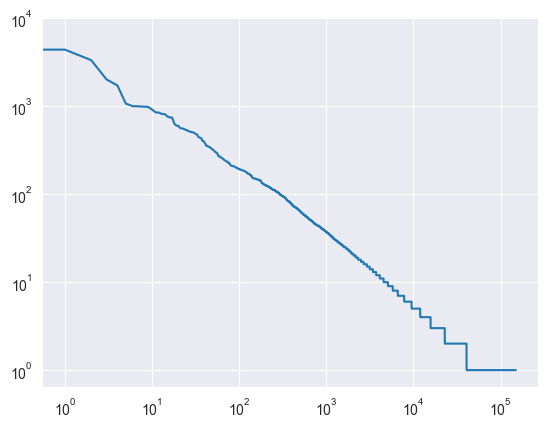

In [25]:
# count the number of pairs occuring just once
print('Number of pairs occurring just once:', len([pair for pair, count in pair_count_counter.items() if count == 1]))

# plot the distribution of the pairs frequencies
plt.loglog([val for pair, val in pair_count_counter.most_common()])




### 2.3 Tokenize the dataset
The function below tokenizes the cleaned text (```example['clean']```) by splitting it on spaces. It replaces the words that are not in the vocabulary with the `<unk>` token.

### Exercise 5: Tokenize the dataset

(5p) Fill in the function below to tokenize the dataset. The function will be applied to the dataset through the `map()` method, so it returns the updated example. Your task is to split the text by spaces and replace the words that are not in the vocabulary with the `<unk>` token.

In [26]:
def tokenize(example, vocab, unknown_token='<unk>'):
    """
    Tokenizes the example from the Dataset
    Args:
        example: an example from the Dataset
        vocab: a vocabulary as a list of words
        unknown_token: a token to replace the words that are not in the vocabulary
    Returns: update example containing 'tokens' column

    """
    text = example['clean']
    tokens = None # list of tokens, your code should fill this variable

    ### YOUR CODE HERE

    # Split the text into tokens by whitespaces
    tokens = text.split()
    
    # Replace tokens not in the vocabulary with the unknown token
    tokens = [token if token in vocab else unknown_token for token in tokens]

    ### YOUR CODE ENDS HERE

    example['tokens'] = tokens
    return example

In [27]:
tweet_ds = tweet_ds.map(tokenize, fn_kwargs={'vocab': vocab})
print(tweet_ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'text_length', 'clean', 'tokens'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['text', 'label', 'text_length', 'clean', 'tokens'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label', 'text_length', 'clean', 'tokens'],
        num_rows: 5000
    })
})


Let us examine several entries from the dataset. We can see that the `tokens` column has been added to each example.

In [28]:
for i in range(10):
    print('Original tweet:')
    print(tweet_ds['train'][i]['text'])
    print('Tokenized tweet:')
    print(tweet_ds['train'][i]['tokens'])

print(len(tweet_ds['train']['tokens']))

Original tweet:
Sunday afternoon walking through Venice in the sun with @user ️ ️ ️ @ Abbot Kinney, Venice
Tokenized tweet:
['sunday', 'afternoon', 'walking', 'through', 'venice', 'in', 'the', 'sun', 'with', 'user', 'abbot', 'kinney', ',', 'venice']
Original tweet:
Time for some BBQ and whiskey libations. Chomp, belch, chomp! (@ Lucille's Smokehouse Bar-B-Que)
Tokenized tweet:
['time', 'for', 'some', 'bbq', 'and', 'whiskey', 'libations', '.', '<unk>', ',', '<unk>', ',', '<unk>', '!', 'lucilles', 'smokehouse', 'barbque']
Original tweet:
Love love love all these people ️ ️ ️ #friends #bff #celebrate #blessed #sundayfunday @ San…
Tokenized tweet:
['love', 'love', 'love', 'all', 'these', 'people', 'friends', 'bff', 'celebrate', 'blessed', 'sundayfunday', 'san…']
Original tweet:
️ ️ ️ ️ @ Toys"R"Us
Tokenized tweet:
['️', '<unk>']
Original tweet:
Man these are the funniest kids ever!! That face! #HappyBirthdayBubb @ FLIPnOUT Xtreme
Tokenized tweet:
['man', 'these', 'are', 'the', 'funniest', 

Make sure that the tokenization works as you intended. If not, revisit the cleaning and tokenization functions.

### Exercise 6: Questions about the tokenization
1. (3p) How many unknown tokens are in the validation dataset after tokenization?
2. (3p) What is the distribution of the number of tokens in the training dataset?
3. (4p) How the number of tokens corresponds to the number of characters in our dataset?
4. (4p) How the size of the vocabulary (```max_vocab_size```) affects the number of unknown tokens?
5. (4p) How does the size of the vocabulary affect the number of tokens in the dataset?
6. (4p) Think about the advantages and disadvantages of the tokenization method we used. What are the cases when it will not work well?

For answering these questions make sure to include a proper mix of numbers/plots/tables etc. and comments.

3931
555056


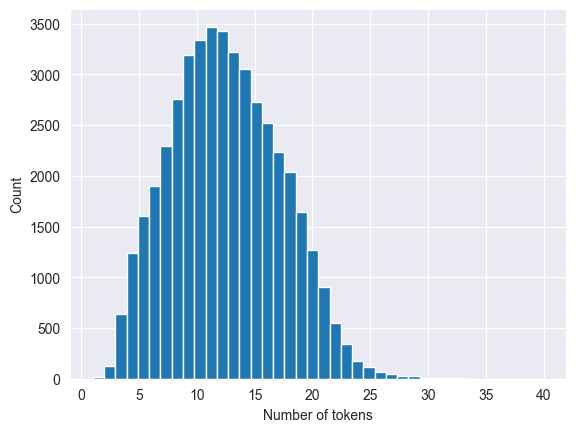

In [51]:
#1 How many unknown tokens are in the validation dataset after tokenization? in column 'tokens' tweet_ds['train']['tokens']
unknown_count = sum(1 for tokens in tweet_ds['validation']['tokens'] if '<unk>' in tokens)
print(unknown_count)

#2 distribution of the number of tokens in the training dataset
plt.hist([len(tokens) for tokens in tweet_ds['train']['tokens']], bins=40)
plt.xlabel('Number of tokens')
plt.ylabel('Count')

total_tokens = 0
for tweet in tweet_ds['train']:
    total_tokens += len(tweet['tokens'])

print(total_tokens)


Text(0, 0.5, 'Number of characters')

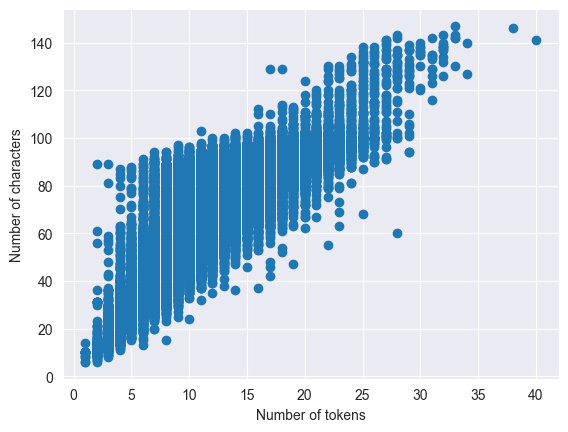

In [30]:
#3 relation between number of tokens and number of characters
plt.scatter([len(tokens) for tokens in tweet_ds['train']['tokens']], [len(example['clean']) for example in tweet_ds['train']])
plt.xlabel('Number of tokens')
plt.ylabel('Number of characters')

Text(0, 0.5, 'Number of unknown tokens')

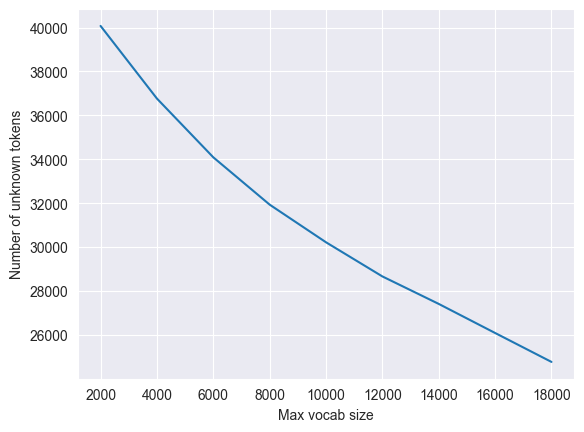

In [31]:
#4 relation between max_vocab_size and number of unknown tokens
max_vocab_sizes = np.arange(2000, 20000, 2000)
unknown_counts = []
for max_vocab_size in max_vocab_sizes:
    vocab = vocab_counter.most_common(max_vocab_size)
    vocab = [word for word, _ in vocab]
    tweet_ds_123 = tweet_ds['train'].map(tokenize, fn_kwargs={'vocab': vocab})
    unknown_count = sum(1 for tokens in tweet_ds_123['tokens'] if '<unk>' in tokens)
    unknown_counts.append(unknown_count)
plt.plot(max_vocab_sizes, unknown_counts)
plt.xlabel('Max vocab size')
plt.ylabel('Number of unknown tokens')


Text(0, 0.5, 'Number of tokens')

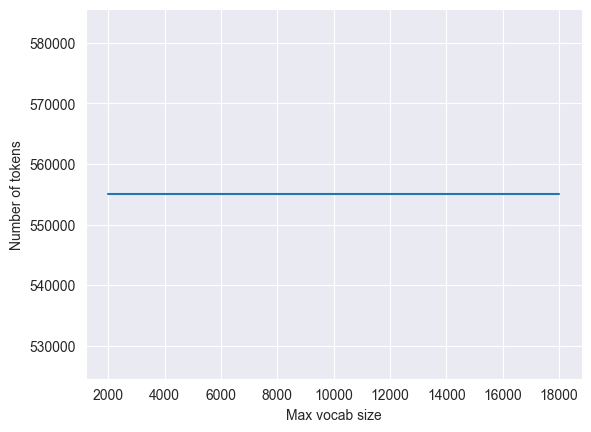

In [32]:
#5 relation between max_vocab_size and number of tokens
max_vocab_sizes = np.arange(2000, 20000, 2000)
token_counts = []
for max_vocab_size in max_vocab_sizes:
    vocab = vocab_counter.most_common(max_vocab_size)
    vocab = [word for word, _ in vocab]
    tweet_ds_123 = tweet_ds['train'].map(tokenize, fn_kwargs={'vocab': vocab})
    token_count = sum(len(tokens) for tokens in tweet_ds_123['tokens'])
    token_counts.append(token_count)
plt.plot(max_vocab_sizes, token_counts)
plt.xlabel('Max vocab size')
plt.ylabel('Number of tokens')

## 3. Byte Pair Encoding

In this section, you will build the Byte Pair Encoding (BPE) tokenizer. BPE is an algorithm that replaces the most frequent pair of tokens (initially characters) with a new token. The algorithm is configured by the number of merges that are performed. You can find the paper here [Neural Machine Translation of Rare Words with Subword Units](https://arxiv.org/abs/1508.07909).

### 3.1 Finding the initial set of characters
BPE algorithm starts with the set of characters that occur in the dataset. We will build a character counter from the dataset.

### Exercise 7: Counting the characters

(5p) In this exercise, we build a counter with the frequencies of all characters in the dataset. Iterate over the dataset and count the characters in the `clean` column. The function returns a `Counter` object with the characters and their frequencies.

In [33]:
def build_character_counter(dataset):
    """
    Builds a character counter from the dataset
    Args:
        dataset: a dataset

    Returns: a character counter

    """
    char_counter = Counter()

    ### YOUR CODE HERE

    for example in tqdm.tqdm(dataset):
        text = example['clean']
        for char in text:
            char_counter[char] += 1


    ### YOUR CODE ENDS HERE

    return char_counter

The next cell applies the function to the training dataset and prints the size of the vocabulary and the most common characters.

In [34]:
char_counter = build_character_counter(tweet_ds['train'])
print(len(char_counter))
print(char_counter.most_common(100))

100%|██████████| 45000/45000 [00:01<00:00, 26923.17it/s]

496
[(' ', 510056), ('e', 263859), ('a', 222430), ('o', 191294), ('t', 187223), ('i', 176273), ('s', 172296), ('n', 157316), ('r', 152188), ('l', 122292), ('h', 106440), ('d', 81100), ('u', 79862), ('m', 73881), ('c', 73644), ('y', 70573), ('g', 62967), ('f', 54175), ('p', 51445), ('w', 47023), ('b', 46238), ('k', 31217), ('v', 30824), ('.', 22551), ('…', 19238), ('!', 16412), (',', 12385), ('j', 6660), ('x', 4469), ('1', 4449), ('z', 4402), ('2', 3592), ('0', 3541), (':', 2784), ('_', 2585), (';', 2354), ('q', 2078), ('6', 1852), ('/', 1711), ('?', 1606), ('5', 1561), ('3', 1430), ('4', 1096), ('️', 949), ('7', 945), ('|', 908), ('9', 817), ('8', 761), ('•', 693), ('・', 642), ('+', 288), ('~', 156), ('—', 130), ('é', 126), ('=', 110), ('’', 84), ('“', 79), ('⠀', 74), ('ñ', 44), ('♡', 31), ('”', 28), ('о', 25), ('▃', 24), ('и', 23), ('͟', 18), ('\\', 18), ('р', 17), ('ン', 15), ('▄', 15), ('н', 12), ('ا', 12), ('ᴵ', 12), ('а', 11), ('б', 10), ('ア', 10), ('¡', 10), ('ˢ', 10), ('á', 9), (

We will filter the characters that occur less than 10 times in the dataset. We will also replace the space character with the `__` token. This is necessary because we want to preserve the spaces between the words in the tokenization process.

In [35]:
bpe_init_vocab = sorted([char for char, _ in char_counter.most_common() if char_counter[char] >= 10])
bpe_init_vocab[bpe_init_vocab.index(' ')] = '__'
print(bpe_init_vocab)

['__', '!', '+', ',', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '\\', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '~', '¡', 'é', 'ñ', 'ˢ', '͟', 'а', 'б', 'и', 'н', 'о', 'р', 'ا', 'ᴵ', '—', '’', '“', '”', '•', '…', '▃', '▄', '♡', '⠀', 'ア', 'ン', '・', '️']


### 3.2 Training the BPE tokenizer

In this section, we will implement the BPE algorithm. We will start by initializing the BPE corpus. The corpus is a list of words from the dataset with their frequency. This makes it easier to find the most frequent pairs of neighbouring tokens (or characters in the beginning). Each word is split into characters and the space (the ```__``` token) is added at the end of each word.

In [36]:
def init_bpe_corpus(dataset):
    """
    Initializes the BPE corpus
    Args:
        dataset: a dataset

    Returns: a BPE corpus

    """

    corpus = Counter()
    for example in dataset:
        words = example['clean'].split()
        words = [' '.join(list(word)) + ' __' for word in words]
        corpus.update(words)
    return corpus

In [37]:
bpe_corpus = init_bpe_corpus(tweet_ds['train'])
print(len(bpe_corpus))

60513


We can check the most common words in the corpus along with their frequencies.

In [38]:
bpe_corpus.most_common(30)

[('. __', 22551),
 ('! __', 16412),
 ('t h e __', 13458),
 (', __', 12385),
 ('u s e r __', 12236),
 ('t o __', 7661),
 ('m y __', 7520),
 ('a __', 6830),
 ('i __', 6731),
 ('i n __', 5937),
 ('a n d __', 5603),
 ('y o u __', 5214),
 ('w i t h __', 5169),
 ('o f __', 5032),
 ('f o r __', 4746),
 ('t h i s __', 4520),
 ('c a l i f o r n i a __', 4337),
 ('a t __', 3579),
 ('i s __', 3479),
 ('l o v e __', 3454),
 ('… __', 3170),
 (': __', 2784),
 ('o n __', 2765),
 ('; __', 2354),
 ('s o __', 2265),
 ('m e __', 2244),
 ('i t __', 2231),
 ('a m p __', 2020),
 ('h a p p y __', 1910),
 ('d a y __', 1909)]

Our BPE implementation will consist of the following steps:
1. Calculate the frequency statistics of adjacent symbol pairs in the corpus.
2. Find the most frequent pair.
3. Merge the most frequent pair.
4. Repeat until the specified number of merges is reached.

The following function calculates the frequency statistics of adjacent symbol pairs in the corpus.

### Exercise 8: Calculate the frequency statistics of adjacent symbol pairs
(5p) Fill in the function below to calculate the frequency statistics of adjacent symbol pairs in the corpus. The function returns a Counter object with the counts of adjacent token pairs. The pairs are represented as tuples of two tokens (e.g., `('cali', 'for')`).

In [39]:
def calculate_bpe_corpus_stats(corpus):
    stats = Counter()

    for word, freq in corpus.items():

        ### YOUR CODE HERE

        # Split the word into symbols 
        # and iterate over adjacent symbol pairs - merge adj symbols
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pair = (symbols[i], symbols[i + 1])
            stats[pair] += freq

        ### YOUR CODE ENDS HERE

    return stats

We can check the most common pairs of characters in the initial corpus.

In [40]:
stats = calculate_bpe_corpus_stats(bpe_corpus)
print(stats.most_common(10))

[(('e', '__'), 75709), (('s', '__'), 57594), (('t', '__'), 43587), (('t', 'h'), 42897), (('e', 'r'), 42178), (('i', 'n'), 40473), (('y', '__'), 39871), (('r', '__'), 36838), (('a', 'n'), 35146), (('n', '__'), 31986)]


Next, we will implement the function that merges the most frequent pair of symbols in the corpus. The function takes the corpus and the most frequent pair of symbols as input and returns the updated corpus.

In [41]:
def merge_corpus(corpus, pair):
    """
    Merges the most frequent pair of symbols in the corpus.
    Args:
        corpus (dict): Keys are words as space-separated symbols (e.g., "l o w"),
                       and values are the frequency counts.
        pair (tuple): A pair of symbols to merge.

    Returns:
        dict: Updated corpus after merging the pair of symbols.
    """
    new_corpus = Counter()
    bigram = " ".join(pair)
    replacement = "".join(pair)
    for word, freq in corpus.items():
        new_word = word.replace(bigram, replacement)
        new_corpus[new_word] = freq
    return new_corpus

The last step is to implement the BPE algorithm. The function takes the initial vocabulary, the corpus, and the number of merges as input. It returns the updated vocabulary, corpus, and the list of merges.
Returning the list of merges is useful for the tokenization process - it makes it faster to tokenize the text. It contains the tuples of the two tokens that were merged. For example, ('to', 'day__') will merge the tokens 'to' and 'day__' into the 'today__' token.

### Exercise 9: BPE algorithm

(10p) Implement the BPE algorithm in the following function. The function should return the updated vocabulary, corpus, and the list of merges. The function should perform the specified number of merges. The vocabulary is a list of tokens, the corpus is a Counter object with the words split by space into tokens, and the merges is a list of tuples with the merged tokens.

You should use the functions you implemented earlier in this section (```calculate_bpe_corpus_stats()```, ```merge_corpus()```).

In [42]:
def bpe(vocab, corpus, num_merges):
    vocab = vocab.copy()
    corpus = corpus.copy()
    merges = []

    for i in tqdm.tqdm(range(num_merges)):
        ### YOUR CODE HERE

# get the most common adjustent sympbol pair from the CURRENT corpus
        stats = calculate_bpe_corpus_stats(corpus)
        best_pair = stats.most_common(1)[0][0]

# merge the most common pair in the corpus and UPDATE the corpus
        corpus = merge_corpus(corpus, best_pair)

# add the merged pair to the vocabulary
        vocab.append("".join(best_pair))

# REGISTER the merging operation
        merges.append(best_pair)
        
        ### YOUR CODE ENDS HERE
    return vocab, corpus, merges

The following cell applies the BPE algorithm to the initial vocabulary and corpus. We will perform 100 merges at first, but you will experiment with different numbers.

In [43]:
bpe_vocab, updated_bpe_corpus, bpe_merges = bpe(bpe_init_vocab, bpe_corpus, num_merges=100)

100%|██████████| 100/100 [00:11<00:00,  8.89it/s]


We can check the size of the BPE vocabulary and the most common tokens.

In [44]:
print(len(bpe_vocab))
print(bpe_vocab[:150])

177
['__', '!', '+', ',', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '\\', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '~', '¡', 'é', 'ñ', 'ˢ', '͟', 'а', 'б', 'и', 'н', 'о', 'р', 'ا', 'ᴵ', '—', '’', '“', '”', '•', '…', '▃', '▄', '♡', '⠀', 'ア', 'ン', '・', '️', 'e__', 's__', 't__', 'th', 'er', 'in', 'y__', 'an', 'd__', 'or', 'a__', 'er__', 'on', '.__', 'o__', 'al', 'ou', 'ar', '…__', 'ing', 'en', 'us', '!__', 'st', 'ing__', 'ch', 're', 'the__', 'lo', ',__', 'l__', 'user__', 'at', 'am', 'for', 'da', 'el', 'it', 'om', 'ri', 'k__', 'es__', 'on__', 'is__', 'be', 'la', 'ho', 'to__', 'in__', 'ni', 'i__', 'you', 'my__', 'of', 'li', 'p__', 've__', 'ha', 'day__', 'il', 'oo', 'es', 'is', 'w__', 'gh', 'and__', 'as__', 'un', 'ir', 'ne', 'with', 'ac', 'ti']


We can also check the most common merges.

In [45]:
print(bpe_merges[:150])

[('e', '__'), ('s', '__'), ('t', '__'), ('t', 'h'), ('e', 'r'), ('i', 'n'), ('y', '__'), ('a', 'n'), ('d', '__'), ('o', 'r'), ('a', '__'), ('er', '__'), ('o', 'n'), ('.', '__'), ('o', '__'), ('a', 'l'), ('o', 'u'), ('a', 'r'), ('…', '__'), ('in', 'g'), ('e', 'n'), ('u', 's'), ('!', '__'), ('s', 't'), ('ing', '__'), ('c', 'h'), ('r', 'e'), ('th', 'e__'), ('l', 'o'), (',', '__'), ('l', '__'), ('us', 'er__'), ('a', 't'), ('a', 'm'), ('f', 'or'), ('d', 'a'), ('e', 'l'), ('i', 't'), ('o', 'm'), ('r', 'i'), ('k', '__'), ('e', 's__'), ('on', '__'), ('i', 's__'), ('b', 'e'), ('l', 'a'), ('h', 'o'), ('t', 'o__'), ('in', '__'), ('n', 'i'), ('i', '__'), ('y', 'ou'), ('m', 'y__'), ('o', 'f'), ('l', 'i'), ('p', '__'), ('v', 'e__'), ('h', 'a'), ('da', 'y__'), ('i', 'l'), ('o', 'o'), ('e', 's'), ('i', 's'), ('w', '__'), ('g', 'h'), ('an', 'd__'), ('a', 's__'), ('u', 'n'), ('i', 'r'), ('n', 'e'), ('w', 'ith'), ('a', 'c'), ('t', 'i'), ('you', '__'), ('an', '__'), ('s', 'e'), ('with', '__'), ('l', 'e'),

### 3.3 Tokenizing the text using BPE

With the tokenizer trained we can now tokenize the text using the BPE vocabulary. We will first build a function that tokenizes any text using our BPE tokenizer (vocabulary and merges). Next we will apply it to our dataset.

The following function tokenizes the text using the BPE vocabulary. It replaces the most frequent pairs of tokens with the new token. The function also replaces the tokens that are not in the vocabulary with the `<unk>` token.

In [46]:
def apply_bpe_tokenization(text, vocab, merges, unk_token='<unk>'):
    """
    Tokenizes the text using BPE vocabulary, preserving spaces as '__'.

    Args:
        text (str): The input text to be tokenized.
        vocab (set): A set containing the BPE vocabulary tokens.

    Returns:
        list: A list of tokens representing the input text.
    """

    words = re.split(r'\s', text)
    words = [' ' + ' '.join(list(word)) + (' __ ' if i < len(words) - 1 else ' ') for i, word in enumerate(words)]

    bpe_tokens = []

    for i, word in enumerate(words):
        for merge in merges:
            word = word.replace(' ' + ' '.join(merge) + ' ', ' ' + ''.join(merge) + ' ')
        bpe_tokens.extend(word.split())

    for i, token in enumerate(bpe_tokens):
        if token not in vocab:
            bpe_tokens[i] = unk_token
    return bpe_tokens


# A test example with a special character. Is the character tokenized correctly as <unk> token?
print(apply_bpe_tokenization(tweet_ds['train'][0]['clean'] + ' 🇺', bpe_vocab, bpe_merges))

['s', 'un', 'day__', 'a', 'f', 't', 'er', 'n', 'o', 'on__', 'w', 'al', 'k', 'ing__', 'th', 'r', 'ou', 'gh', '__', 'v', 'en', 'ic', 'e__', 'in__', 'the__', 's', 'un', '__', 'w', 'i', 'th', '__', 'user__', 'a', 'b', 'b', 'o', 't__', 'k', 'in', 'ne', 'y__', ',__', 'v', 'en', 'ic', 'e__', '<unk>']


The function below will apply our BPE tokenizer to the dataset. It will add a new column `bpe_tokens` to each example.

In [47]:
def tokenize_bpe(example, vocab, merges, column_name='bpe_tokens', unk_token='<unk>'):
    """
    Tokenizes the example from the Dataset using BPE
    Args:
        example: an example from the Dataset
        vocab: a BPE vocabulary

    Returns: update example containing 'bpe_tokens' column

    """
    text = example['clean']
    bpe_tokens = apply_bpe_tokenization(text, vocab, merges, unk_token)
    example[column_name] = bpe_tokens
    return example

tweet_ds = tweet_ds.map(tokenize_bpe, fn_kwargs={'vocab': bpe_vocab, 'merges': bpe_merges, 'column_name': 'bpe_tokens'})
print(tweet_ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'text_length', 'clean', 'tokens', 'bpe_tokens'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['text', 'label', 'text_length', 'clean', 'tokens', 'bpe_tokens'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label', 'text_length', 'clean', 'tokens', 'bpe_tokens'],
        num_rows: 5000
    })
})


We will inspect the both tokenizations of several examples from the ```validation``` subset. Try to find the ```<unk>``` tokens in the printed examples.

In [48]:
for i in range(10):
    print('Original tweet:')
    print(tweet_ds['validation'][i]['text'])
    print('Word tokenization:')
    print(tweet_ds['validation'][i]['tokens'])
    print('BPE tokenization:')
    print(tweet_ds['validation'][i]['bpe_tokens'])
    print()

Original tweet:
A little throwback with my favourite person @ Water Wall
Word tokenization:
['a', 'little', 'throwback', 'with', 'my', 'favourite', 'person', 'water', 'wall']
BPE tokenization:
['a__', 'l', 'it', 't', 'l', 'e__', 'th', 'ro', 'w', 'b', 'ac', 'k__', 'w', 'i', 'th', '__', 'my__', 'f', 'a', 'v', 'ou', 'r', 'it', 'e__', 'p', 'er', 's', 'on__', 'w', 'at', 'er__', 'w', 'al', 'l']

Original tweet:
glam on @user yesterday for #kcon makeup using @user in #featherette,…
Word tokenization:
['glam', 'on', 'user', 'yesterday', 'for', 'kcon', 'makeup', 'using', 'user', 'in', '<unk>', ',', '…']
BPE tokenization:
['g', 'l', 'am', '__', 'on__', 'user__', 'y', 'e', 'st', 'er', 'day__', 'for__', 'k', 'c', 'on__', 'm', 'ak', 'e', 'u', 'p__', 'us', 'ing__', 'user__', 'in__', 'f', 'e', 'a', 'th', 'er', 'e', 't', 't', 'e__', ',__', '…']

Original tweet:
Democracy Plaza in the wake of a stunning outcome #Decision2016 @ NBC News
Word tokenization:
['<unk>', 'plaza', 'in', 'the', 'wake', 'of', 'a

### Exercise 10: Comparing tokenizers

Train the BPE tokenizer with different number of merges. Compare the tokenization results with the word tokenization.
1. (5p) What are the differences?
2. (5p) Compare the number of tokens created by your tokenizers.
3. (5p) Calculate the number of `<unk>` tokens in the validation dataset for each tokenizer.
4. (5p) Compare the average length in tokens between different tokenizers.
5. (5p) What are the advantages and disadvantages of the BPE tokenizer?

In [49]:
# GET BPEs with different number of merges for comparison
bpe_vocab50, updated_bpe_corpus50, bpe_merges50 = bpe(bpe_init_vocab, bpe_corpus, num_merges=50)
bpe_vocab100, updated_bpe_corpus100, bpe_merges100 = bpe(bpe_init_vocab, bpe_corpus, num_merges=100)
bpe_vocab200, updated_bpe_corpus200, bpe_merges200 = bpe(bpe_init_vocab, bpe_corpus, num_merges=200)
bpe_vocab500, updated_bpe_corpus500, bpe_merges500 = bpe(bpe_init_vocab, bpe_corpus, num_merges=500)
bpe_vocab1000, updated_bpe_corpus1000, bpe_merges1000 = bpe(bpe_init_vocab, bpe_corpus, num_merges=1000)

100%|██████████| 1000/1000 [01:23<00:00, 12.03it/s]


In [50]:
tweet_ds = tweet_ds.map(tokenize_bpe, fn_kwargs={'vocab': bpe_vocab50, 'merges': bpe_merges50, 'column_name': 'bpe_tokens_50'})
tweet_ds = tweet_ds.map(tokenize_bpe, fn_kwargs={'vocab': bpe_vocab100, 'merges': bpe_merges100, 'column_name': 'bpe_tokens_100'})
tweet_ds = tweet_ds.map(tokenize_bpe, fn_kwargs={'vocab': bpe_vocab200, 'merges': bpe_merges200, 'column_name': 'bpe_tokens_200'})
tweet_ds = tweet_ds.map(tokenize_bpe, fn_kwargs={'vocab': bpe_vocab500, 'merges': bpe_merges500, 'column_name': 'bpe_tokens_500'})
tweet_ds = tweet_ds.map(tokenize_bpe, fn_kwargs={'vocab': bpe_vocab1000, 'merges': bpe_merges1000, 'column_name': 'bpe_tokens_1000'})

Map:  40%|████      | 20082/50000 [00:10<00:15, 1894.16 examples/s]


KeyboardInterrupt: 

In [57]:
#1 The unk tokens are at least much much less likelly to appear, in fact they only appear if the letter is not in the vocab, which itself is unlikely.
   # compared to word tokenization where unkown is assigned to any word Out Of Vocabulary
   # This comes at the cost of being much more fragmented, with many smaller, many times character tokens.
   # Hence I try to increase the number of merges to make the vocabulary more meaningful and less granular
print('Original tweet:')
print(tweet_ds['validation'][2]['text'])
print('Word tokenization:')
print(tweet_ds['validation'][2]['tokens'])
print('BPE tokenization 100:')
print(tweet_ds['validation'][2]['bpe_tokens'])
print('BPE tokenization 1000:')
print(tweet_ds['validation'][2]['bpe_tokens_1000'])

Original tweet:
Democracy Plaza in the wake of a stunning outcome #Decision2016 @ NBC News
Word tokenization:
['<unk>', 'plaza', 'in', 'the', 'wake', 'of', 'a', 'stunning', '<unk>', '<unk>', '<unk>', 'news']
BPE tokenization 100:
['d', 'e', 'm', 'o', 'c', 'r', 'ac', 'y__', 'p', 'la', 'z', 'a__', 'in__', 'the__', 'w', 'ak', 'e__', 'of__', 'a__', 'st', 'un', 'n', 'ing__', 'ou', 't', 'c', 'om', 'e__', 'd', 'e', 'c', 'is', 'i', 'on', '2', '0', '1', '6', '__', 'n', 'b', 'c', '__', 'ne', 'w', 's']
BPE tokenization 1000:
['de', 'mo', 'c', 'r', 'ac', 'y__', 'pla', 'za__', 'in__', 'the__', 'w', 'ak', 'e__', 'of__', 'a__', 'st', 'un', 'n', 'ing__', 'out', 'c', 'om', 'e__', 'de', 'c', 'is', 'i', 'on', '2016__', 'n', 'b', 'c__', 'new', 's']


Number of tokens in tokens: 555056
Number of tokens in bpe_tokens_50: 2142505
Number of tokens in bpe_tokens_100: 1882195
Number of tokens in bpe_tokens_200: 1676402
Number of tokens in bpe_tokens_500: 1532990
Number of tokens in bpe_tokens_1000: 1473900


/var/folders/84/sbq4d0yx2vdcrx0_5_cy2hmh0000gn/T/ipykernel_97275/2257014270.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(token_counts_df[column_names].values, labels=column_names)


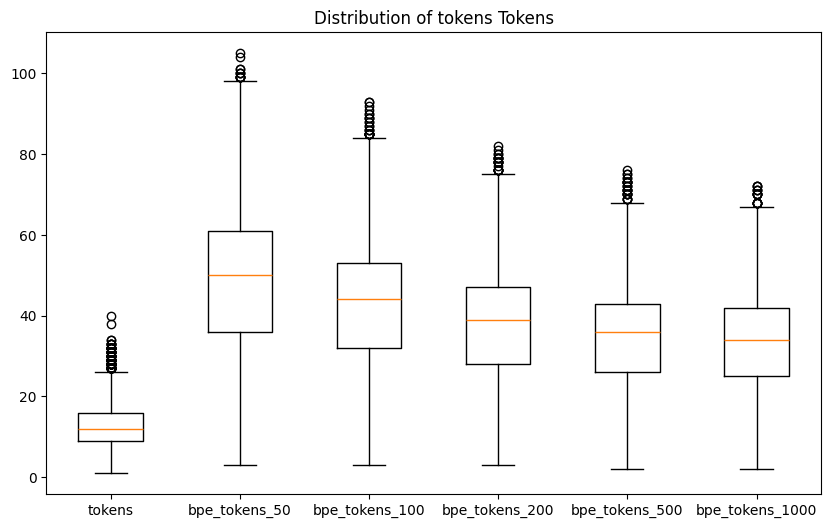

In [64]:
#2 compare the number of tokens created by each tokenizer: 'tokens', 'bpe_tokens_50', 'bpe_tokens_100', 'bpe_tokens_200', 'bpe_tokens_500', 'bpe_tokens_1000'
def compare_token_counts(dataset, column_names):
    token_counts = {}
    for column_name in column_names:
        token_counts[column_name] = [len(example[column_name]) for example in dataset]
    return pd.DataFrame(token_counts)

column_names = ['tokens', 'bpe_tokens_50', 'bpe_tokens_100', 'bpe_tokens_200', 'bpe_tokens_500', 'bpe_tokens_1000']

token_counts_df = compare_token_counts(tweet_ds['train'], column_names)
plt.figure(figsize=(10, 6))
plt.boxplot(token_counts_df[column_names].values, labels=column_names)
plt.title('Distribution of tokens Tokens')

# count and print the number of tokens in each column
for column_name in column_names:
    print(f'Number of tokens in {column_name}:', token_counts_df[column_name].sum())

    

/var/folders/84/sbq4d0yx2vdcrx0_5_cy2hmh0000gn/T/ipykernel_97275/1869144620.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(unk_counts_df[column_names].values, labels=column_names)


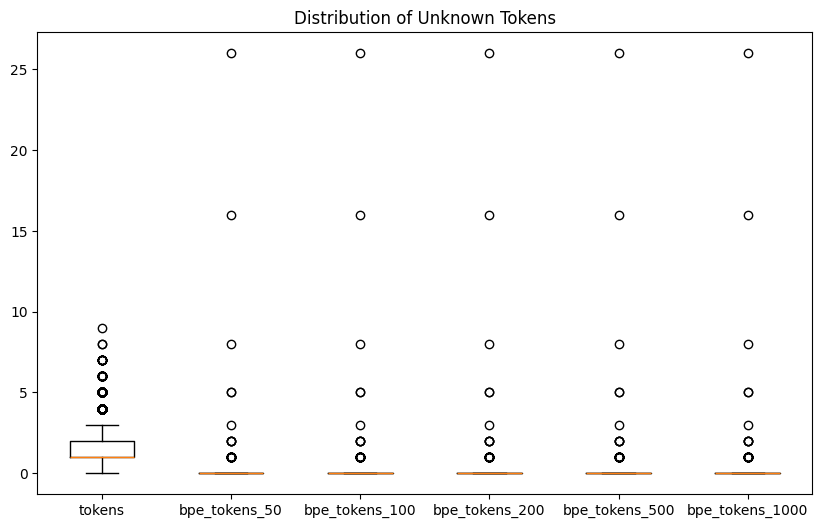

Number of unkown tokens in tokens: 8341
Number of unkown tokens in bpe_tokens_50: 95
Number of unkown tokens in bpe_tokens_100: 95
Number of unkown tokens in bpe_tokens_200: 95
Number of unkown tokens in bpe_tokens_500: 95
Number of unkown tokens in bpe_tokens_1000: 95


In [63]:
#3 compare the number of Unk tokens created by each tokenizer: 'tokens', 'bpe_tokens_50', 'bpe_tokens_100', 'bpe_tokens_200', 'bpe_tokens_500', 'bpe_tokens_1000'
# tweet_ds['validation'], column_names
def compare_unk_counts(dataset, column_names):
    unk_counts = {}
    for column_name in column_names:
        unk_counts[column_name] = [sum(1 for token in example[column_name] if token == '<unk>') for example in dataset]
    return pd.DataFrame(unk_counts)

unk_counts_df = compare_unk_counts(tweet_ds['validation'], column_names)
plt.figure(figsize=(10, 6))
plt.boxplot(unk_counts_df[column_names].values, labels=column_names)
plt.title('Distribution of Unknown Tokens')
plt.show()

# count and print the number of tokens in each column
for column_name in column_names:
    print(f'Number of unkown tokens in {column_name}:', unk_counts_df[column_name].sum())

/var/folders/84/sbq4d0yx2vdcrx0_5_cy2hmh0000gn/T/ipykernel_97275/2824314438.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(token_lengths_df[column_names].values, labels=column_names)


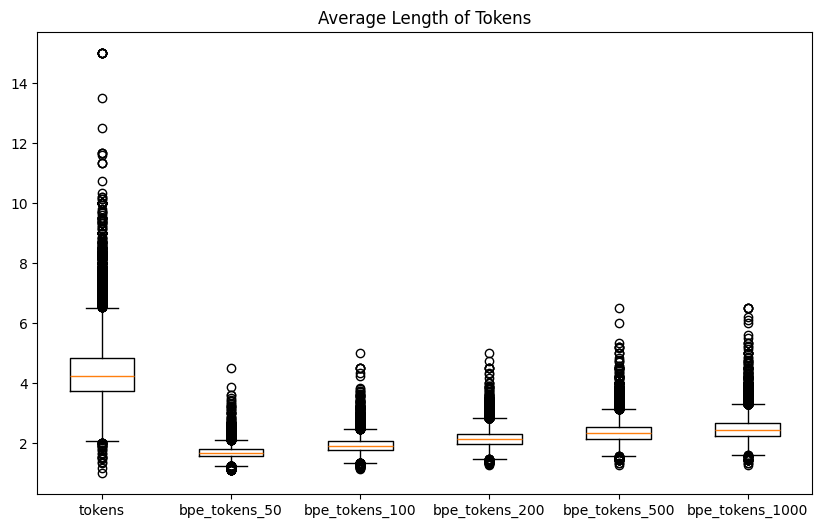

Average length of tokens in tokens: 4.362834079013316
Average length of tokens in bpe_tokens_50: 1.690436749667516
Average length of tokens in bpe_tokens_100: 1.9259298157241422
Average length of tokens in bpe_tokens_200: 2.1633312577530175
Average length of tokens in bpe_tokens_500: 2.3721739028554207
Average length of tokens in bpe_tokens_1000: 2.46918509653989


In [65]:
#4 Compare the average length of the tokens created by each tokenizer: 'tokens', 'bpe_tokens_50', 'bpe_tokens_100', 'bpe_tokens_200', 'bpe_tokens_500', 'bpe_tokens_1000'
def compare_token_lengths(dataset, column_names):
    token_lengths = {}
    for column_name in column_names:
        # calculate the length of each token in the column and store the average length
        token_lengths[column_name] = [sum(len(token) for token in example[column_name]) / len(example[column_name]) if len(example[column_name]) > 0 else 0 for example in dataset]
    return pd.DataFrame(token_lengths)

token_lengths_df = compare_token_lengths(tweet_ds['train'], column_names) # limiting myself to the train set for simplicity :D
plt.figure(figsize=(10, 6))
plt.boxplot(token_lengths_df[column_names].values, labels=column_names)
plt.title('Average Length of Tokens')
plt.show()

for column_name in column_names:
    print(f'Average length of tokens in {column_name}:', token_lengths_df[column_name].mean())


In [56]:
#5 advantages and disadvantages of BFE tokenization
# Advantages:
# - BFE can handle OOV words quite well, as shown by the number of unk tokens compared with the word tokenization

# Disadvantages:
# - BFE can create a lot of tokens, as shown by the number of tokens created by each tokenizer
# - BFE especially with low number of merges creates very granullar, possibly meaningless to humans tokens


For answering these questions make sure to include a proper mix of numbers/plots/tables etc. and comments.